## Part 1
## Data Manipulation

### Answer 1.1

### Print shape of pandas dataframe and find duplicate rows

In [ ]:
### Import pandas
import pandas as pd
import requests
import json

In [ ]:
# Read json file from http url
response = requests.get("https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2022/data/assignment2data.json")

# Create a panadas dataframe
dataframe = pd.read_json(response.text, lines=True)

# Print dataframe shape
print(dataframe.shape)

### Use pandas duplicated() to get duplicate rows and use len() to count total number
print(len(dataframe[dataframe.duplicated()]))

# Create non-duplicated dataframe
uniq_df = dataframe.drop_duplicates()

# Print shape of non-duplicated dataframe
print(uniq_df.shape)

(46279, 43)
249
(46030, 43)


### `shape` is the most optimized way to get shape of the dataframe. Alternative is to use `len()` to get number of rows and `len(columns)` to get number of columns. However, the combined time for `len()` and `len(columns)` is greater than time to execute `shape` as demonstrated below

In [ ]:
%timeit uniq_df.shape
%timeit (len(uniq_df), len(uniq_df.columns))

875 ns ± 6.79 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
961 ns ± 6.17 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Answer 1.2

In [ ]:
def missingdf(df: pd.DataFrame):
  # Get a series with columns and percent missing values
  missing_rate = df.isnull().mean().mul(100)
  # Convert series to dataframe and reset index and rename columns to column_name and percent_missing
  missing_rate_df = missing_rate.to_frame().reset_index() \
    .rename(columns= {'index': 'column_name', 0: 'percent_missing'})

  print(f"Missing rate dataframe:\n {missing_rate_df.to_string()}")

In [ ]:
missingdf(uniq_df)

Missing rate dataframe:
                  column_name  percent_missing
0                 sacc_items         0.000000
1                work_orders         0.000000
2               female_items         0.000000
3   is_newsletter_subscriber         0.000000
4                 male_items         0.000000
5          afterpay_payments         0.000000
6               msite_orders         0.000000
7                 wftw_items         0.000000
8                 mapp_items         0.000000
9                     orders         0.000000
10               cc_payments         0.000000
11               curvy_items         0.000000
12           paypal_payments         0.000000
13                macc_items         0.000000
14                   cancels         0.000000
15                   revenue         0.000000
16                   returns         0.000000
17   other_collection_orders         0.000000
18        parcelpoint_orders         0.000000
19               customer_id         0.000000
20       

### Alternative is to use `sum()` and `len(df)`. However, it's a bit slower than using `mean()`

In [ ]:
%timeit uniq_df.isnull().sum().mul(100).divide(len(uniq_df))
%timeit uniq_df.isnull().mean().mul(100)

8.9 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.78 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Answer 1.3

In [ ]:
# Define a function to return tuple of numerical and categorical columns
def column_list(df: pd.DataFrame) -> tuple:
  return (df.select_dtypes('number').columns.tolist(), df.select_dtypes('object').columns.tolist())

In [ ]:
# Get tuple of numeric columns and categorical columns
numeric_columns, categorical_columns = column_list(uniq_df)

print(f"Numerical columns: {numeric_columns}")
print(f"Categorical columns: {categorical_columns}")
# Describe numeric columns; by default describe only returns statics for numeric columns
uniq_df.describe()

Numerical columns: ['sacc_items', 'work_orders', 'female_items', 'male_items', 'afterpay_payments', 'msite_orders', 'wftw_items', 'mapp_items', 'orders', 'cc_payments', 'curvy_items', 'paypal_payments', 'macc_items', 'cancels', 'revenue', 'returns', 'other_collection_orders', 'parcelpoint_orders', 'android_orders', 'days_since_last_order', 'vouchers', 'average_discount_used', 'shipping_addresses', 'redpen_discount_used', 'mftw_items', 'days_since_first_order', 'unisex_items', 'home_orders', 'coupon_discount_applied', 'desktop_orders', 'ios_orders', 'apple_payments', 'wspt_items', 'wacc_items', 'items', 'mspt_items', 'devices', 'different_addresses', 'wapp_items', 'other_device_orders', 'average_discount_onoffer']
Categorical columns: ['is_newsletter_subscriber', 'customer_id']


,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,...,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
mean,0.087899,0.240995,6.472800,1.720660,0.053595,0.978557,1.633826,0.926613,4.111362,0.642972,...,0.000565,0.378753,0.573908,8.583750,0.116229,1.277580,0.116402,3.800782,0.000043,0.190171
std,0.539604,1.565071,17.830007,5.468827,0.225220,2.859161,4.088452,3.689578,8.122569,0.479128,...,0.023760,1.712662,2.542536,19.959377,0.716745,0.533286,0.320710,12.679782,0.009322,0.190702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.150000
75%,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.314300
max,29.000000,84.000000,537.000000,273.000000,1.000000,172.000000,261.000000,151.000000,665.000000,1.000000,...,1.000000,56.000000,353.000000,701.000000,38.000000,3.000000,1.000000,409.000000,2.000000,1.000000


### Answer 1.4

### Let's plot everything

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

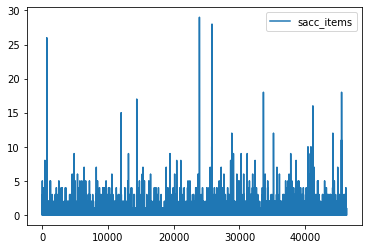

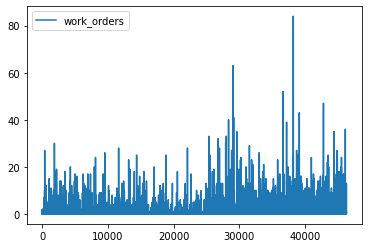

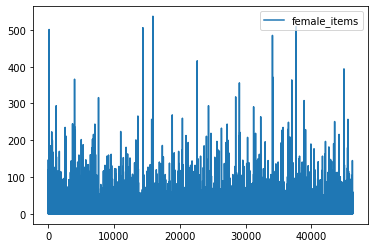

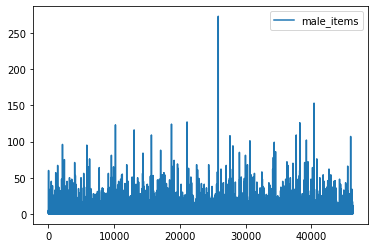

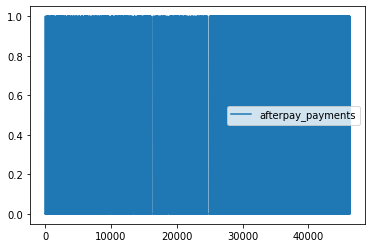

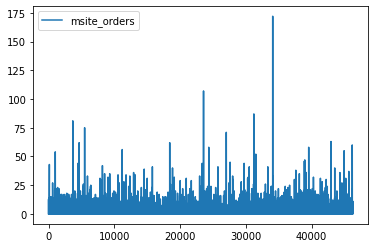

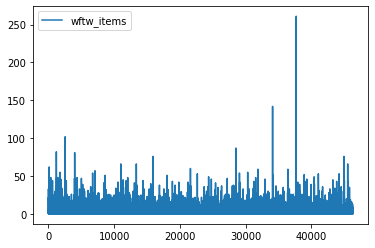

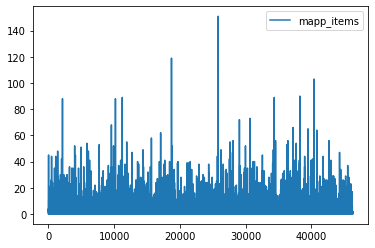

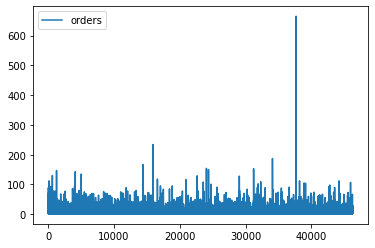

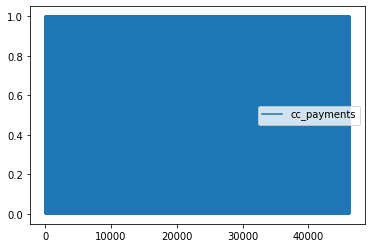

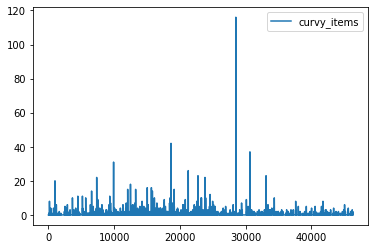

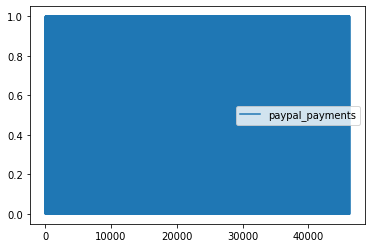

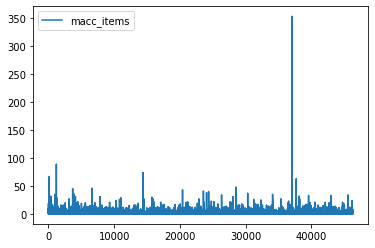

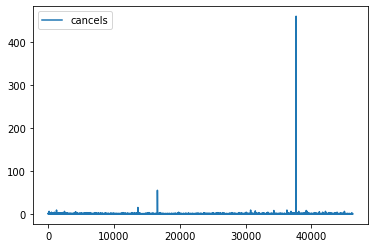

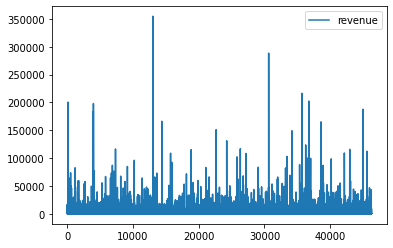

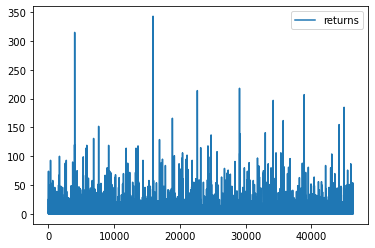

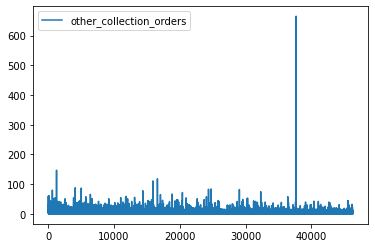

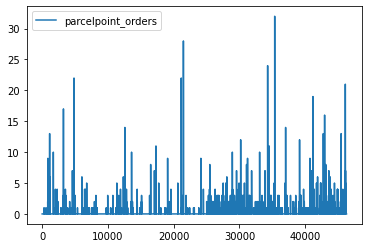

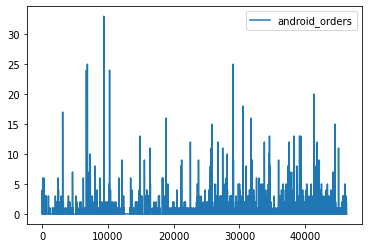

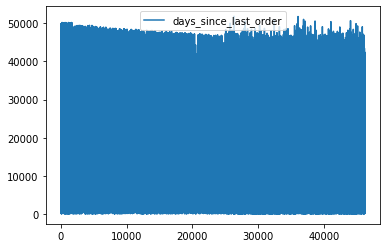

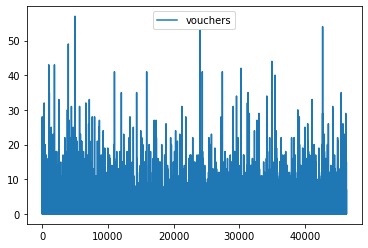

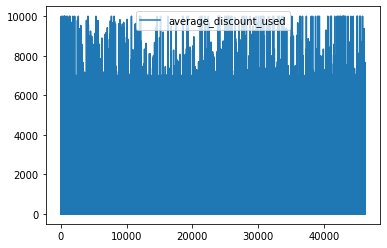

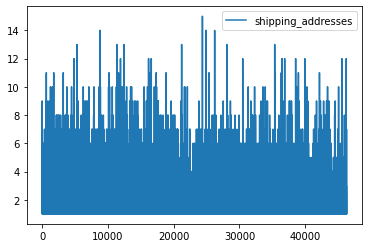

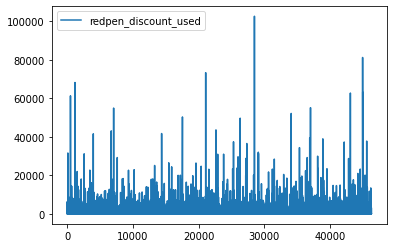

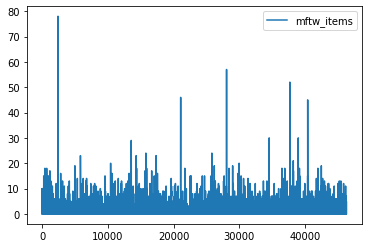

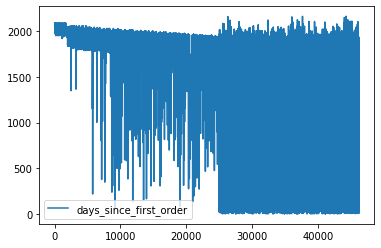

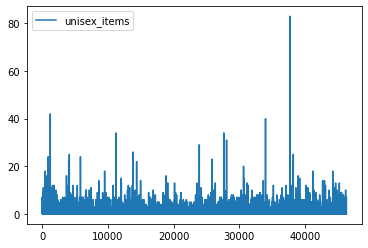

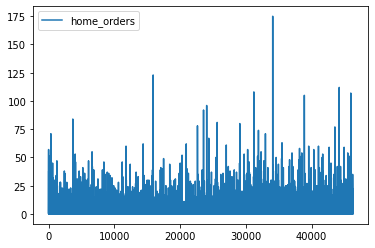

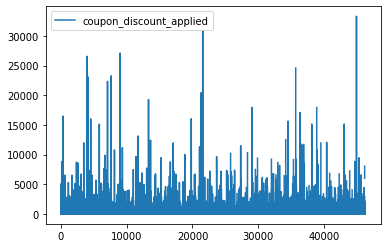

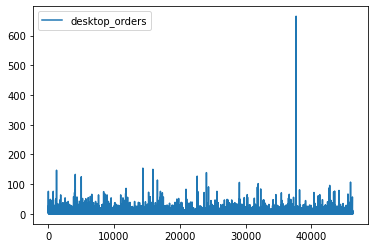

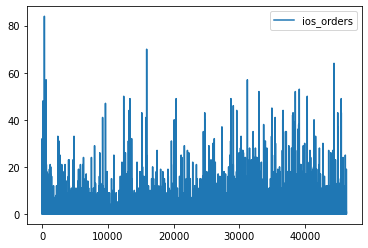

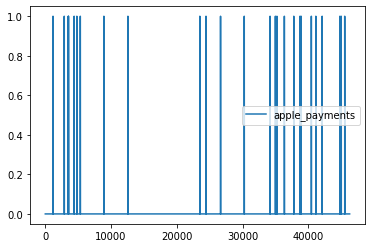

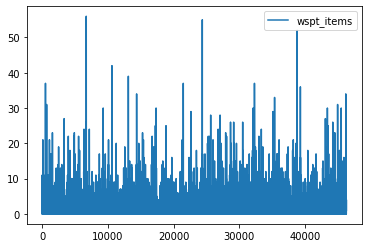

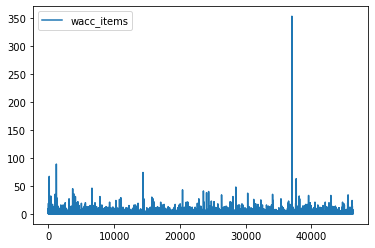

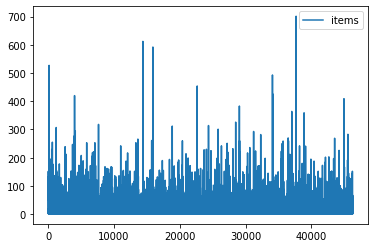

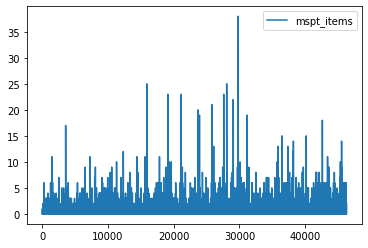

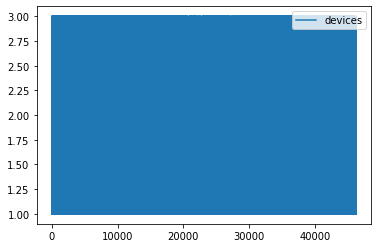

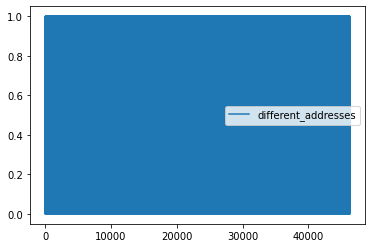

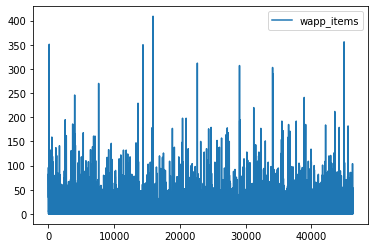

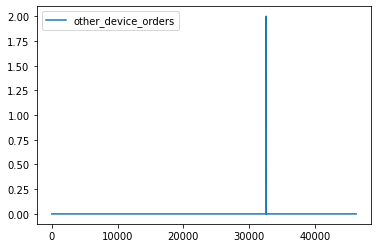

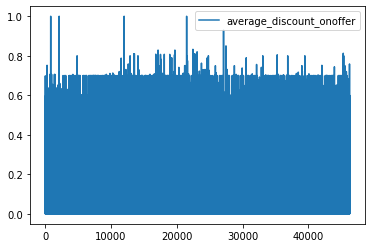

In [ ]:
for column in numeric_columns:
  uniq_df[[column]].plot()

### Values for `days_since_last_order` look suspiciously high. Let's compare with `days_since_last_order` and `days_since_first_order`

,days_since_last_order,days_since_first_order
count,46030.000000,46030.000000
mean,24535.400217,1371.811601
std,16934.525487,605.777029
min,24.000000,1.000000
25%,6768.000000,904.250000
50%,25416.000000,1713.000000
75%,41640.000000,1786.000000
max,51840.000000,2164.000000


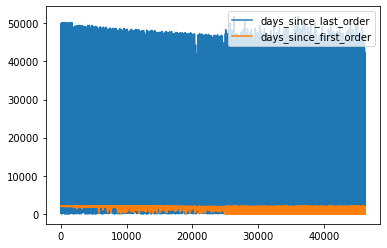

In [ ]:
uniq_df[['days_since_last_order', 'days_since_first_order']].plot()
uniq_df[['days_since_last_order', 'days_since_first_order']].describe()

#### `days_since_last_order` is corrupted. Minimum value for `days_since_last_order` is greater than `days_since_first_order` and it's not possible. Also, max value for `days_since_last_order` is 51840 which will translate to ~142 years.

### Let's look at all the rows where number of orders is 1. This should return same values for `days_since_first_order` and `days_since_last_order`

In [ ]:
uniq_df[uniq_df.orders == 1][['days_since_last_order', 'days_since_first_order']]

,days_since_last_order,days_since_first_order
4,49272,2053
5,49056,2044
6,49008,2042
9,48816,2034
13,48600,2025
...,...,...
46264,2808,117
46266,19104,796
46269,1752,73
46270,10968,457


In [ ]:
# Let's see if there's any relation between `days_since_last_order` and `days_since_first_order`
uniq_df[uniq_df.orders == 1]['days_since_last_order']/ uniq_df[uniq_df.orders == 1]['days_since_first_order']

4        24.0
5        24.0
6        24.0
9        24.0
13       24.0
         ... 
46264    24.0
46266    24.0
46269    24.0
46270    24.0
46271    24.0
Length: 21283, dtype: float64

### It looks like `days_since_last_order` is actually in hours rather than days. We can fix this by dividing all the values in `days_since_last_order` by 24

In [ ]:
# divide the column by 24.
uniq_df['days_since_last_order'] = uniq_df['days_since_last_order'].divide(24)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Let's look at other correlated columns. `female_items` should be a sum of all the other female `subcategories`

,female_items,wapp_items,wftw_items,wacc_items,wspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
mean,6.472800,3.800782,1.633826,0.573908,0.378753
std,17.830007,12.679782,4.088452,2.542536,1.712662
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,2.000000,0.000000,0.000000
max,537.000000,409.000000,261.000000,353.000000,56.000000


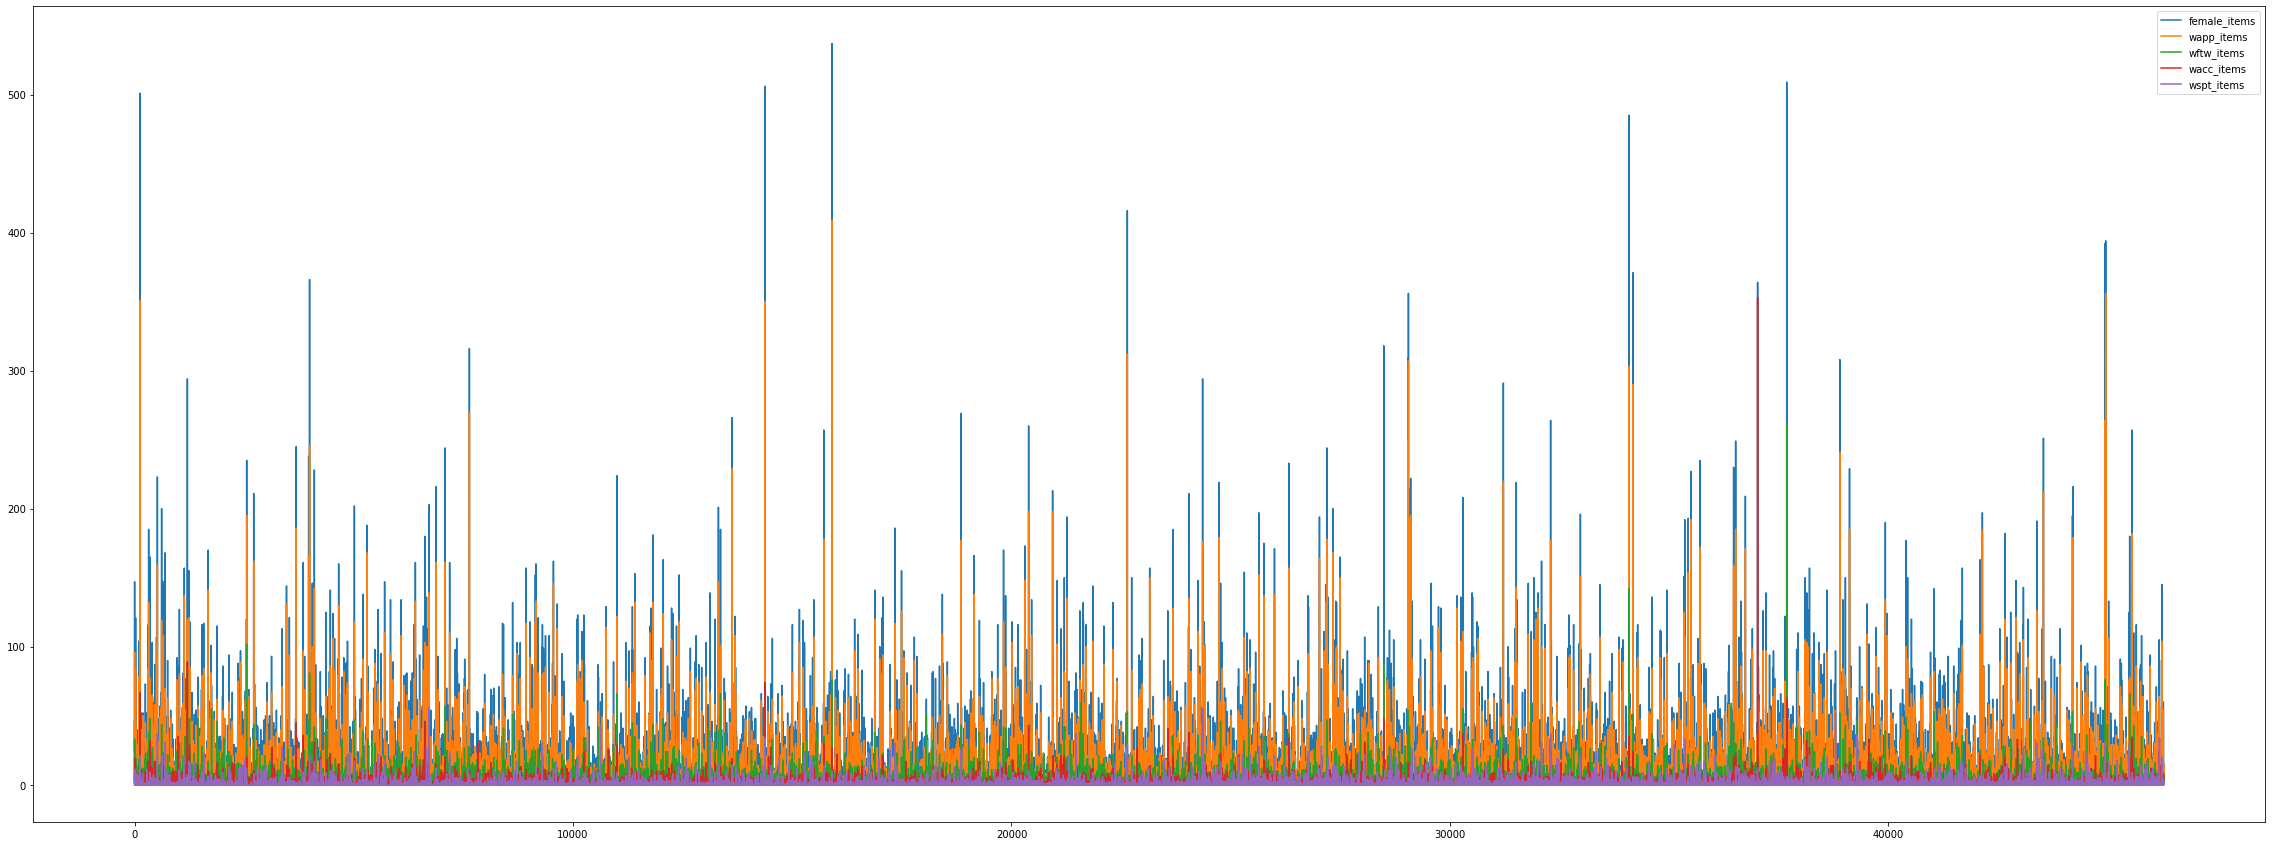

In [ ]:
uniq_df[['female_items', 'wapp_items', 'wftw_items', 'wacc_items', 'wspt_items']].plot(figsize=(40,15))
uniq_df[['female_items', 'wapp_items', 'wftw_items', 'wacc_items', 'wspt_items']].describe()

### Let's look at other correlated columns. `male_items` should be a sum of all the other male `subcategories`

,male_items,mapp_items,mftw_items,macc_items,mspt_items
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
mean,1.720660,0.926613,0.421290,0.573908,0.116229
std,5.468827,3.689578,1.444193,2.542536,0.716745
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,273.000000,151.000000,78.000000,353.000000,38.000000


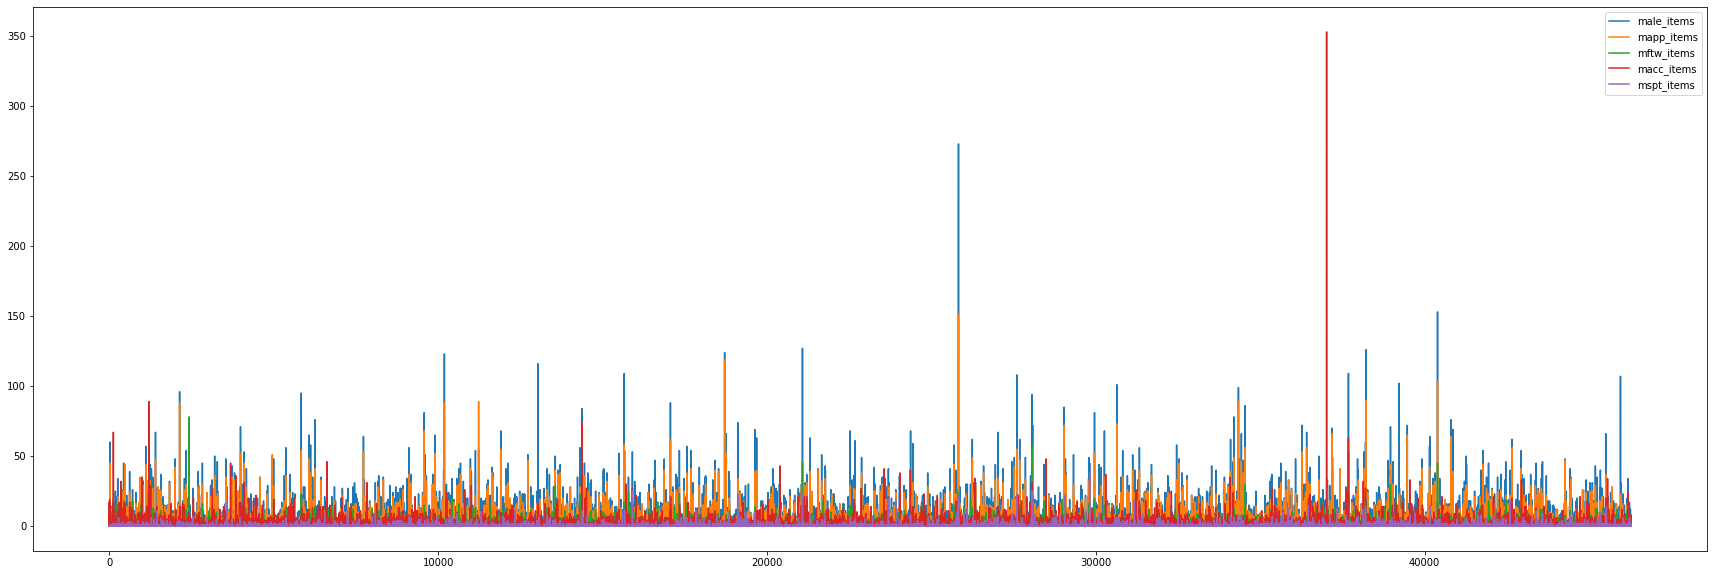

In [ ]:
uniq_df[['male_items', 'mapp_items', 'mftw_items', 'macc_items', 'mspt_items']].plot(figsize=(30,10))
uniq_df[['male_items', 'mapp_items', 'mftw_items', 'macc_items', 'mspt_items']].describe()

### Let's also inspect the dataframe to see which one of `macc_items` or `male_items` is corrupted

In [ ]:
uniq_df[uniq_df.curvy_items > 0][['items', 'female_items', 'male_items', 'unisex_items', 'mapp_items', 'mftw_items', 'macc_items', 'mspt_items', 'wapp_items', 'wftw_items', 'wacc_items', 'wspt_items', 'sacc_items', 'curvy_items']].head(50)

,items,female_items,male_items,unisex_items,mapp_items,mftw_items,macc_items,mspt_items,wapp_items,wftw_items,wacc_items,wspt_items,sacc_items,curvy_items
107,16,16,0,0,0,0,0,0,1,14,0,0,0,1
128,132,130,2,0,1,0,0,0,110,14,0,5,0,1
160,14,14,0,0,0,0,0,0,4,2,0,0,0,8
354,23,22,0,1,0,1,7,0,2,8,7,1,0,4
553,59,48,10,1,9,0,4,0,31,8,4,3,0,1
781,9,8,0,1,0,0,0,0,2,2,0,0,0,4
876,4,4,0,0,0,0,1,0,1,1,1,0,0,1
998,90,86,1,3,0,0,35,0,15,19,35,0,0,20
1016,6,6,0,0,0,0,0,0,2,3,0,0,0,1
1140,45,42,2,1,0,0,2,0,32,8,2,0,0,1


### Let's check the relationship between `macc_items` and `wacc_items`

In [ ]:
uniq_df[uniq_df.macc_items != uniq_df.wacc_items]

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer


### From above it looks like `macc_items` is corrupt. `macc_items` has same values as `wacc_items`. To fix this column, we will take the same of all the `women's items`, `men's items` and `sacc_items` (except `macc_items`)

In [ ]:
print(uniq_df[['male_items', 'unisex_items', 'mapp_items', 'mftw_items', 'mspt_items', 'macc_items']].head(50))
uniq_df = uniq_df.eval('macc_items = male_items + unisex_items - mapp_items - mftw_items - mspt_items')
print(uniq_df[['male_items', 'unisex_items', 'mapp_items', 'mftw_items', 'mspt_items', 'macc_items']].head(50))

    male_items  unisex_items  mapp_items  mftw_items  mspt_items  macc_items
0            2             2           2           0           0           1
1            0             2           0           0           0           4
2            3             2           2           0           0          17
3            0             2           1           0           0           0
4            0             0           0           0           0           0
5            0             0           0           0           0           1
6            0             0           0           0           0           0
7            0             1           1           0           0           0
8            0             1           0           0           0           3
9            0             0           0           0           0           0
10           5             5           4           1           0          19
11           0             6           0           0           0           3

### Answer 1.5

### Find percentage of customers who have purchased `female_items` paid by `credit_card`

In [ ]:
# find customers who have purchased `female_items`
customers_bought_female_items_df = uniq_df[uniq_df.female_items > 0]
# print percentage of customers who paid using credit card
percentage_customers_paid_using_cc = customers_bought_female_items_df.groupby('cc_payments')['customer_id'].count().mul(100)[1] / len(customers_bought_female_items_df)
print(f"Percentage of customers who have purchased `female_items` paid using credit card is {percentage_customers_paid_using_cc}")

Percentage of customers who have purchased `female_items` paid using credit card is 65.4812873161497


### An alternative is to filter dataframe where `cc_payments == 1` and then count number of rows using `len()`. However, this is slower than using `groupby()`

In [ ]:
%timeit customers_bought_female_items_df.groupby('cc_payments')['customer_id'].count().mul(100)[1]
%timeit len(customers_bought_female_items_df[customers_bought_female_items_df.cc_payments == 1]) * 100

4.29 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.65 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Find the total revenue of customers who paid using credit card

In [ ]:
total_revenue = round(uniq_df.groupby('cc_payments')['revenue'].sum()[1])
print(f"Total revenue of customers who paid using credit card is {total_revenue}")

Total revenue of customers who paid using credit card is 50189329


### An alternative solution is to use filter rows where `cc_payments == 1` and then `sum(revenue)`. This is a lot slower as can be seen below

In [ ]:
%timeit round(uniq_df.groupby('cc_payments')['revenue'].sum()[1])
%timeit round(uniq_df[uniq_df.cc_payments == 1]['revenue'].sum())

1.48 ms ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.33 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Answer 1.6

### Change value of `Y` to `1` and `N` to `0` in the column `is_newsletter_subscriber`

In [ ]:
# create a dictionary mapping old values to new values
value_dict = {
    'Y': 1,
    'N': 0
}
%timeit uniq_df['is_newsletter_subscriber'].map(value_dict)
%timeit uniq_df['is_newsletter_subscriber'].replace(to_replace=value_dict)

2.69 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.6 ms ± 395 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### As can be seen above `replace()` is much slower than `map()` so we will use `map()` to change values in column `is_newsletter_subscriber`

In [ ]:
# Use `map()` to update the column. Alternative is to use `replace()` but it's lot slower and uses more memory
uniq_df.loc[:, 'is_newsletter_subscriber'] = uniq_df['is_newsletter_subscriber'].map(value_dict)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### print value count for the column `is_newsletter_subscriber`

In [ ]:
print(uniq_df['is_newsletter_subscriber'].value_counts())

0    27203
1    18827
Name: is_newsletter_subscriber, dtype: int64


### Answer 1.7

### Create some new features

In [ ]:
uniq_df.loc[:, 'female_item_rate'] = uniq_df['female_items'] / uniq_df['items']
uniq_df.loc[:, 'male_item_rate'] = uniq_df['male_items'] / uniq_df['items']
uniq_df.loc[:, 'unisex_items_rate'] = uniq_df['unisex_items'] / uniq_df['items']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
### Write a code find out how many rows (customers) could have the value female_item_rate == 1 and the value male_item_rate == 1 and the value orders > 4.11
### NOTE: this should obviously be 0 as items must be the sum of female_items, male_items and unisex_items. This means that female_item_rate and male_item_rate both can't be 1 at the same time
print(len(uniq_df[(uniq_df.female_item_rate == 1.0) & (uniq_df.male_item_rate == 1.0) & (uniq_df.orders > 4.11)]))

0


### Answer 1.8

### Group data on the value of column `is_newsletter_subscriber` to show the average order value, the max order value, the median order value.

In [ ]:
uniq_df.groupby('is_newsletter_subscriber').orders.agg(['mean', 'max', 'median'])

,mean,max,median
is_newsletter_subscriber,,,
0,2.484175,665,1.0
1,6.462474,234,3.0


### Part 2

### Advanced Data Analytics for Data Science

### Answer 2.1

In [ ]:
# Install pmdarima and kats package. This is needed for answer 2.2
!pip install pmdarima
!pip install kats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.8 MB/s 
     |████████████████████████████████| 9.8 MB 29.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 5.8 MB/s 
     |████████████████████████████████| 361 kB 34.0 MB/s 
     |████████████████████████████████| 9.5 MB 53.2 MB/s 
     |████████████████████████████████| 67.3 MB 95 kB/s 
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 950 kB 32.0 MB/s 
     |████████████████████████████████| 347 kB 38.7 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet


In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import math

In [ ]:
# define a parser to parse month-year date string and convert into datetime objects
def parser(x):
	return datetime.strptime(x, '%Y-%m')

# Download the csv file from http url and create a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/tulip-lab/open-data/master/HK2012-2018/Australia.csv", parse_dates=[0], index_col=0, date_parser=parser)

In [ ]:
# inspect dataframe to make sure that it's loaded properly
df.tail()

,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,Hong Kong cuisine,...,bus hong kong,taxi hong kong,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre
date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,40084,70,69,29,88,52,61,88,52,27,...,42,49,37,19,52,46,76,17,88,22
2018-09-01,49974,94,66,39,89,55,83,89,37,22,...,47,82,38,41,64,71,84,12,89,0
2018-10-01,55805,78,77,72,77,74,67,77,41,34,...,62,38,41,29,37,49,47,14,77,0
2018-11-01,48813,72,72,45,76,49,71,76,35,28,...,28,51,29,35,62,62,72,12,76,23
2018-12-01,61122,67,66,16,96,27,59,96,27,37,...,46,42,36,16,41,100,54,19,96,0


,arrival
date,
2012-01-01,60116
2012-02-01,43982
2012-03-01,57736
2012-04-01,58640
2012-05-01,46312


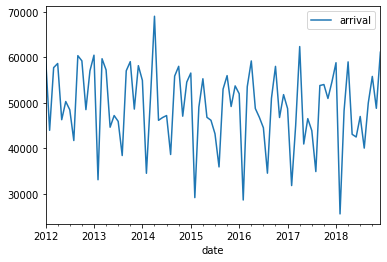

In [ ]:
# Drop null values
df.dropna(inplace=True)
# create arrivals dataframe
arrivals_df = df[['arrival']]
# plot arrivals
arrivals_df.plot()
arrivals_df.head()

### Let's try STL decomposition. We might need to try a few different values for seasonal to see the one that best represent `arrivals`

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
# Let's find seasonality and trend
stl = STL(arrivals_df, period=12, robust=True)
res = stl.fit()

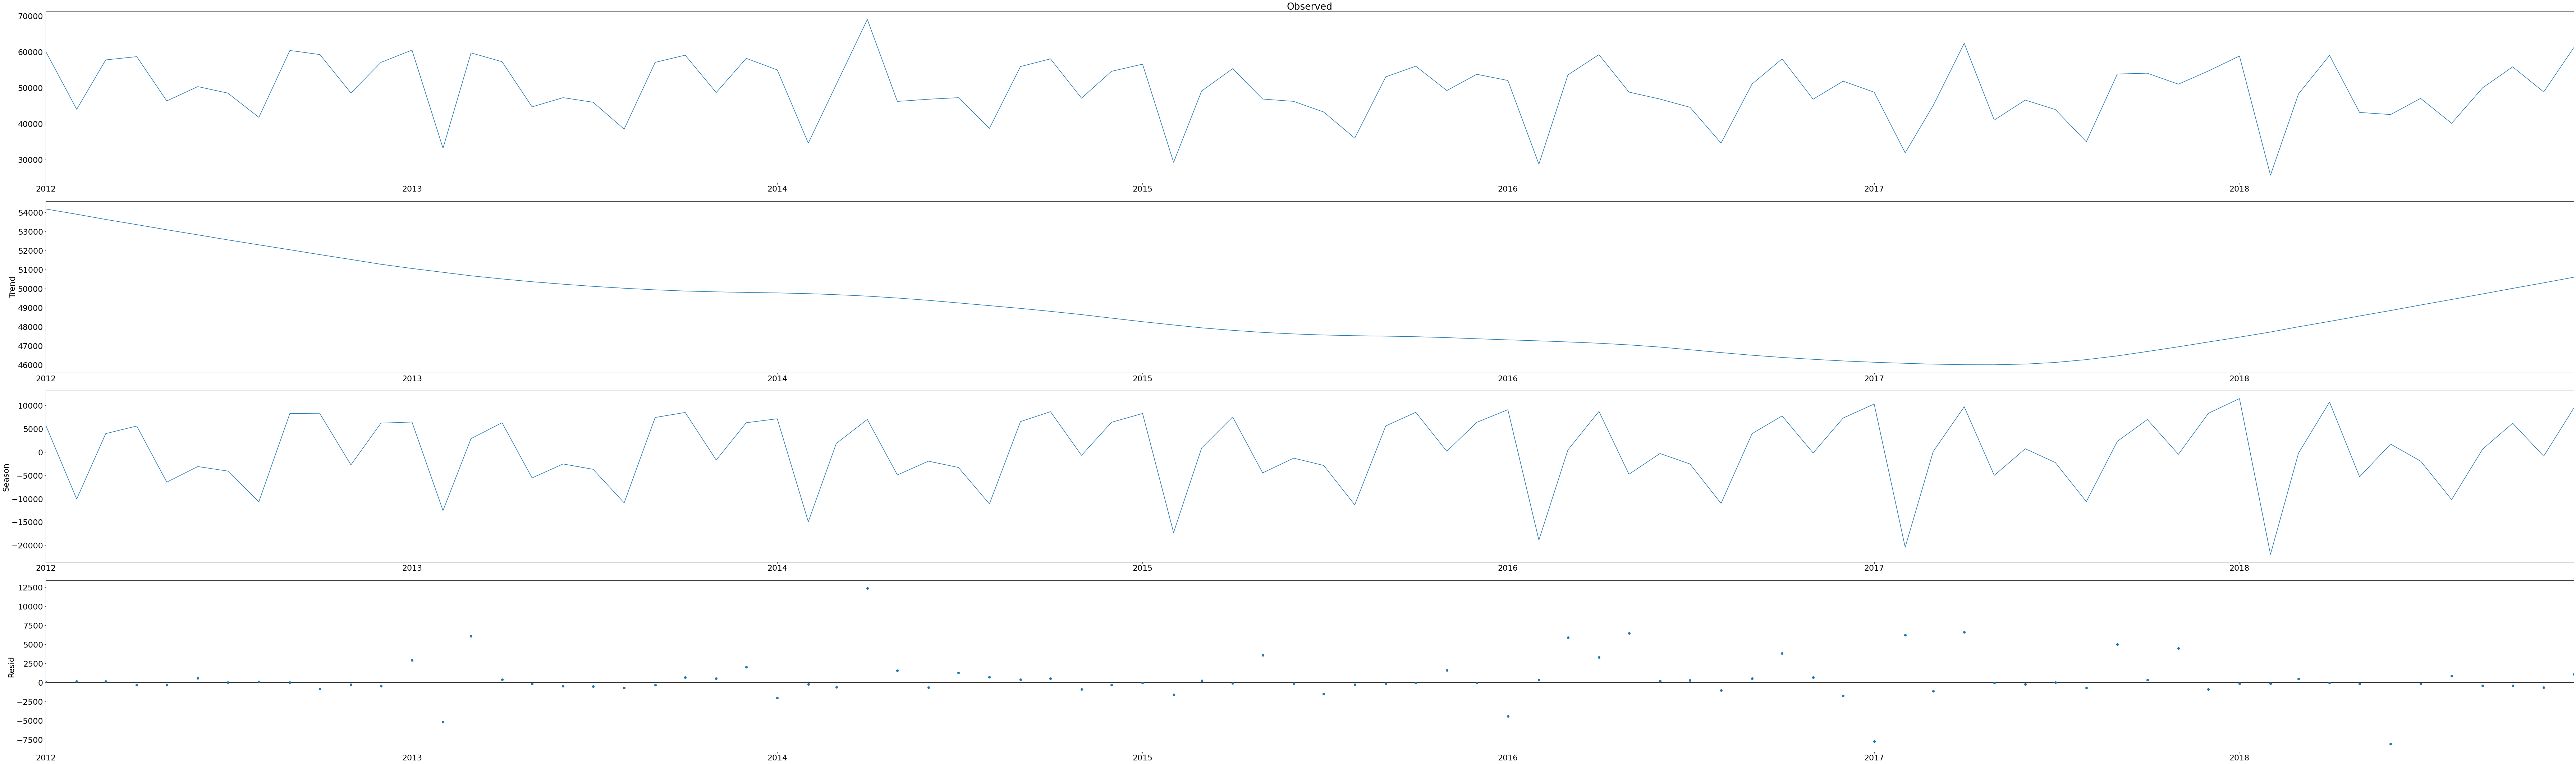

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [100, 30]
plt.rcParams['font.size'] =  22
fig = res.plot()

### You can clearly see the seasonality in the timeseries. There's a peak in the arrivals towards the end of year and then a dip in early months and a dip in Januaray/February. You also can see the yearly dip that's getting pronounced over the time.

### General trend in `arrivals` has been decreasing over time until early 2017 when the trend starts to increase again

In [ ]:
# define a function to calculate mean of last n values
def moving_avg(series: pd.Series, n: int) -> float:
  return np.mean(series.tail(n))

In [ ]:
# define a function to calculate RMSE for a series and a given n
def calculate_rmse(trend: pd.Series, actuals: pd.DataFrame, n: int) -> tuple:
  num_moving_data = len(trend) - n
  mse = 0
  forecasts = []
  for i in range(num_moving_data):
    forecast = moving_avg(trend.iloc[:n + i], n)
    forecast_error = actuals.iloc[n+i] - forecast
    forecasts.append(forecast)
    mse += forecast_error ** 2
  return (math.sqrt(mse / num_moving_data), forecasts)

In [ ]:
# let's try to find a value for n that produces the smallest rmse for the training data
training_data = res.trend.loc['2012-01-01':'2017-12-01']
arrivals_train_df = arrivals_df.loc['2012-01-01':'2017-12-01']
least_rmse = None
best_n = None
for i in range(1, len(training_data)):
  rmse, _ = calculate_rmse(training_data, arrivals_train_df, i)
  if not least_rmse or least_rmse > rmse:
    least_rmse = rmse
    best_n = i
print(f"Least RMSE is {least_rmse} for window size {best_n}")

Least RMSE is 4403.0928456979855 for window size 70


### Based on the training data, the best window size to forecast arrivals is  70. Let's try this on test data.

RMSE on test data is: 11562.607527193573


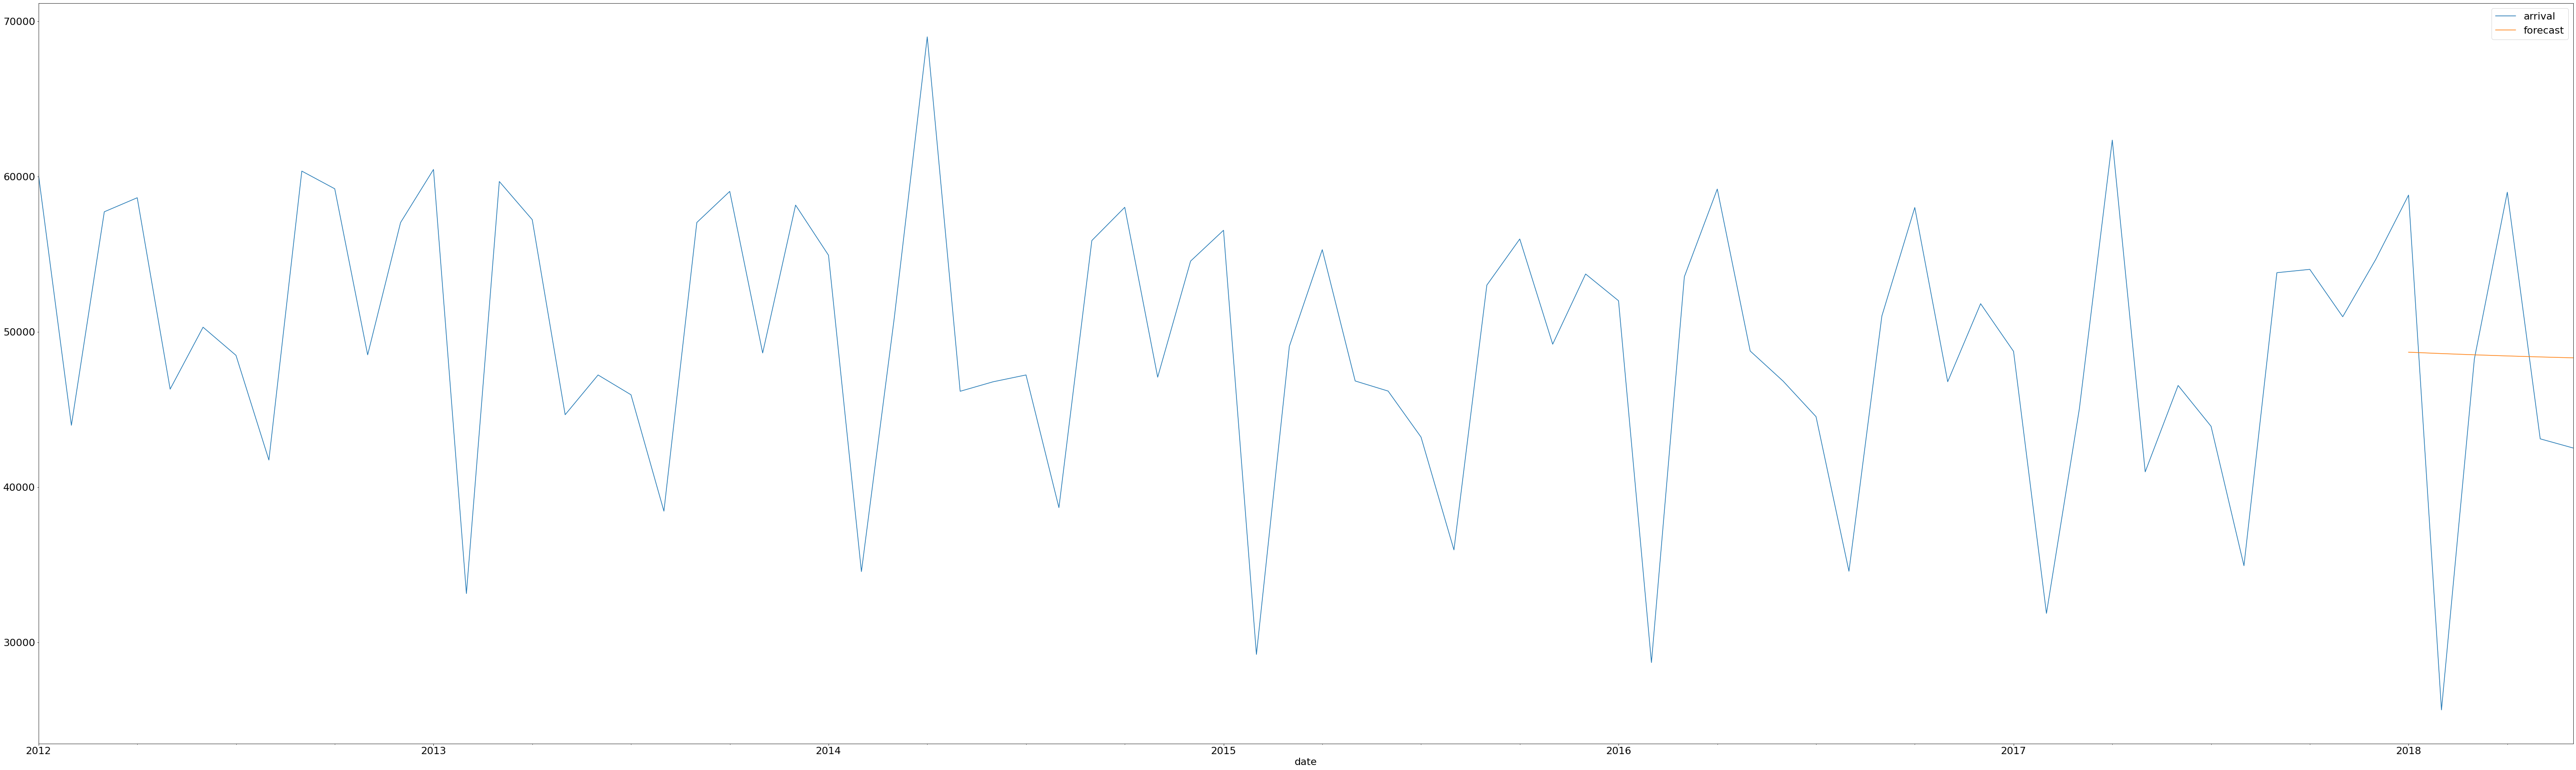

In [ ]:
# Calculate RMSE for test data i.e. between 01-2018 and 06-2018
# We will start from last month of the training data based on our model
test_trend = res.trend.loc['2012-03-01':'2018-06-01']
arrivals_test_df = arrivals_df.loc['2012-03-01':'2018-06-01']
root_mean_squared_error, forecasts = calculate_rmse(test_trend, arrivals_test_df, best_n)
print(f"RMSE on test data is: {root_mean_squared_error}")

forecast_df = pd.DataFrame(forecasts, columns=['forecast'], index=arrivals_df.loc['2018-01-01':'2018-06-01'].index)

ax = arrivals_df['2012-01-01':'2018-06-01'].plot()
forecast_df.plot(ax=ax)

### Answer 2.2

In [ ]:
from sklearn.metrics import mean_squared_error

# define a function to calculate RMSE
def rmse(actuals: pd.Series, forecasts: pd.Series) -> float:
  return math.sqrt(mean_squared_error(actuals, forecasts))

In [ ]:
# import arima model from statsmodels package
from pmdarima.arima import ARIMA

# define a function to run arima on training data and forecast for test data
def run_arima(df: pd.DataFrame, exogenous_features: pd.DataFrame) -> tuple:
  train_df = df.loc['2012-01-01':'2017-12-01']
  test_df = df.loc['2018-01-01':'2018-06-01']
  exog_train = None
  exog_test = None
  if exogenous_features is not None:
    exog_train = exogenous_features.loc['2012-01-01':'2017-12-01']
    exog_test = exogenous_features.loc['2018-01-01':'2018-06-01']

  least_rmse = None
  best_params = (1, 1, 1)
  best_forecasts = None

  # perform grid search to find the best model (with smallest rmse on test data)
  for p in range(1, 4):
    for d in range(1, 4):
      for q in range(1, 4):
        model = ARIMA(order=(p, d, q), suppress_warnings=True)
        arima_model = model.fit(train_df, exog_train, freq='M')

        # predict arrivals for next 6 months
        forecasts = arima_model.predict(n_periods=6, X=exog_test)

        error = rmse(test_df, forecasts)
        if not least_rmse or least_rmse > error:
          least_rmse = error
          best_params = (p, d, q)
          best_forecasts = forecasts
  return (least_rmse, best_params, best_forecasts)

In [ ]:
least_rmse, best_params, best_forecasts = run_arima(arrivals_df, None)

Least Root mean squared error: 8445.90920078829 for (3, 1, 3)


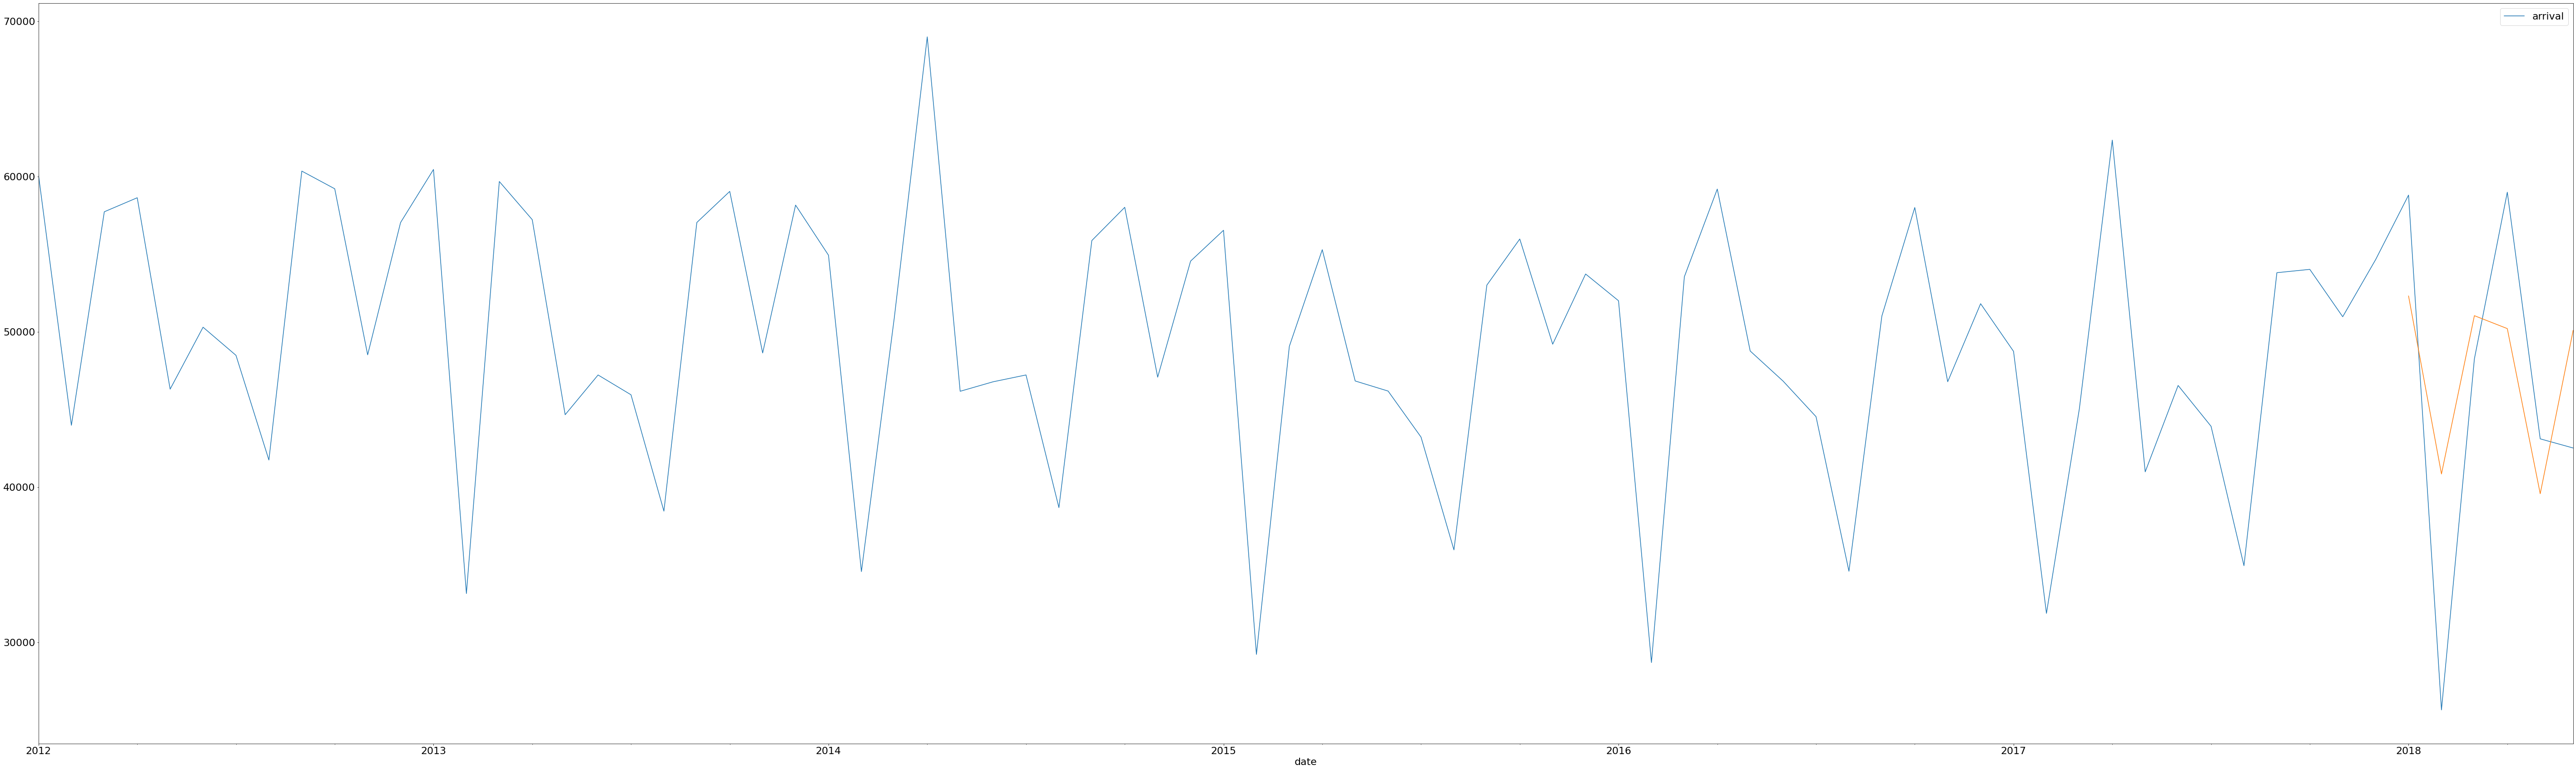

In [ ]:
print(f"Least Root mean squared error: {least_rmse} for {best_params}")
# Let's plot both the test data and predictions
arrivals_df['2012-01-01':'2018-06-01'].plot()
best_forecasts.plot(label='forecast')

### Let's see if we can improve this forecast by using exogeneous features included in the dataframe

In [ ]:
exogenous_features = df.drop('arrival', axis=1).dropna(inplace=True)
least_rmse_with_exog, best_params_with_exog, best_forecasts_with_exog = run_arima(arrivals_df, exogenous_features)
print(f"Least Root mean squared error: {least_rmse_with_exog} for {best_params_with_exog}")

Least Root mean squared error: 8445.90920078829 for (3, 1, 3)


### Let's try prophet for forecasting

In [ ]:
from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams

In [ ]:
def run_prophet(df: pd.DataFrame) -> tuple:
  train_df = df.loc['2012-01-01':'2017-12-01']
  test_df = df.loc['2018-01-01':'2018-06-01']
  least_rmse = None
  best_params = (1, 1, 1)
  best_forecasts = None

  train_df = train_df.reset_index()
  train_ts = TimeSeriesData(train_df, time_col_name='date')
  # create a model param instance
  params = ProphetParams(growth='logistic',
                         seasonality_mode ='multiplicative',
                         cap=train_df['arrival'].max())

  # create a prophet model instance
  m = ProphetModel(train_ts, params)

  m.fit()

  # forecasts arrivals for next 6 months
  forecasts = m.predict(steps=len(test_df))

  error = rmse(test_df.reset_index()['arrival'], forecasts['fcst'])
  return error, forecasts

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE is 3662.8422817795863


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



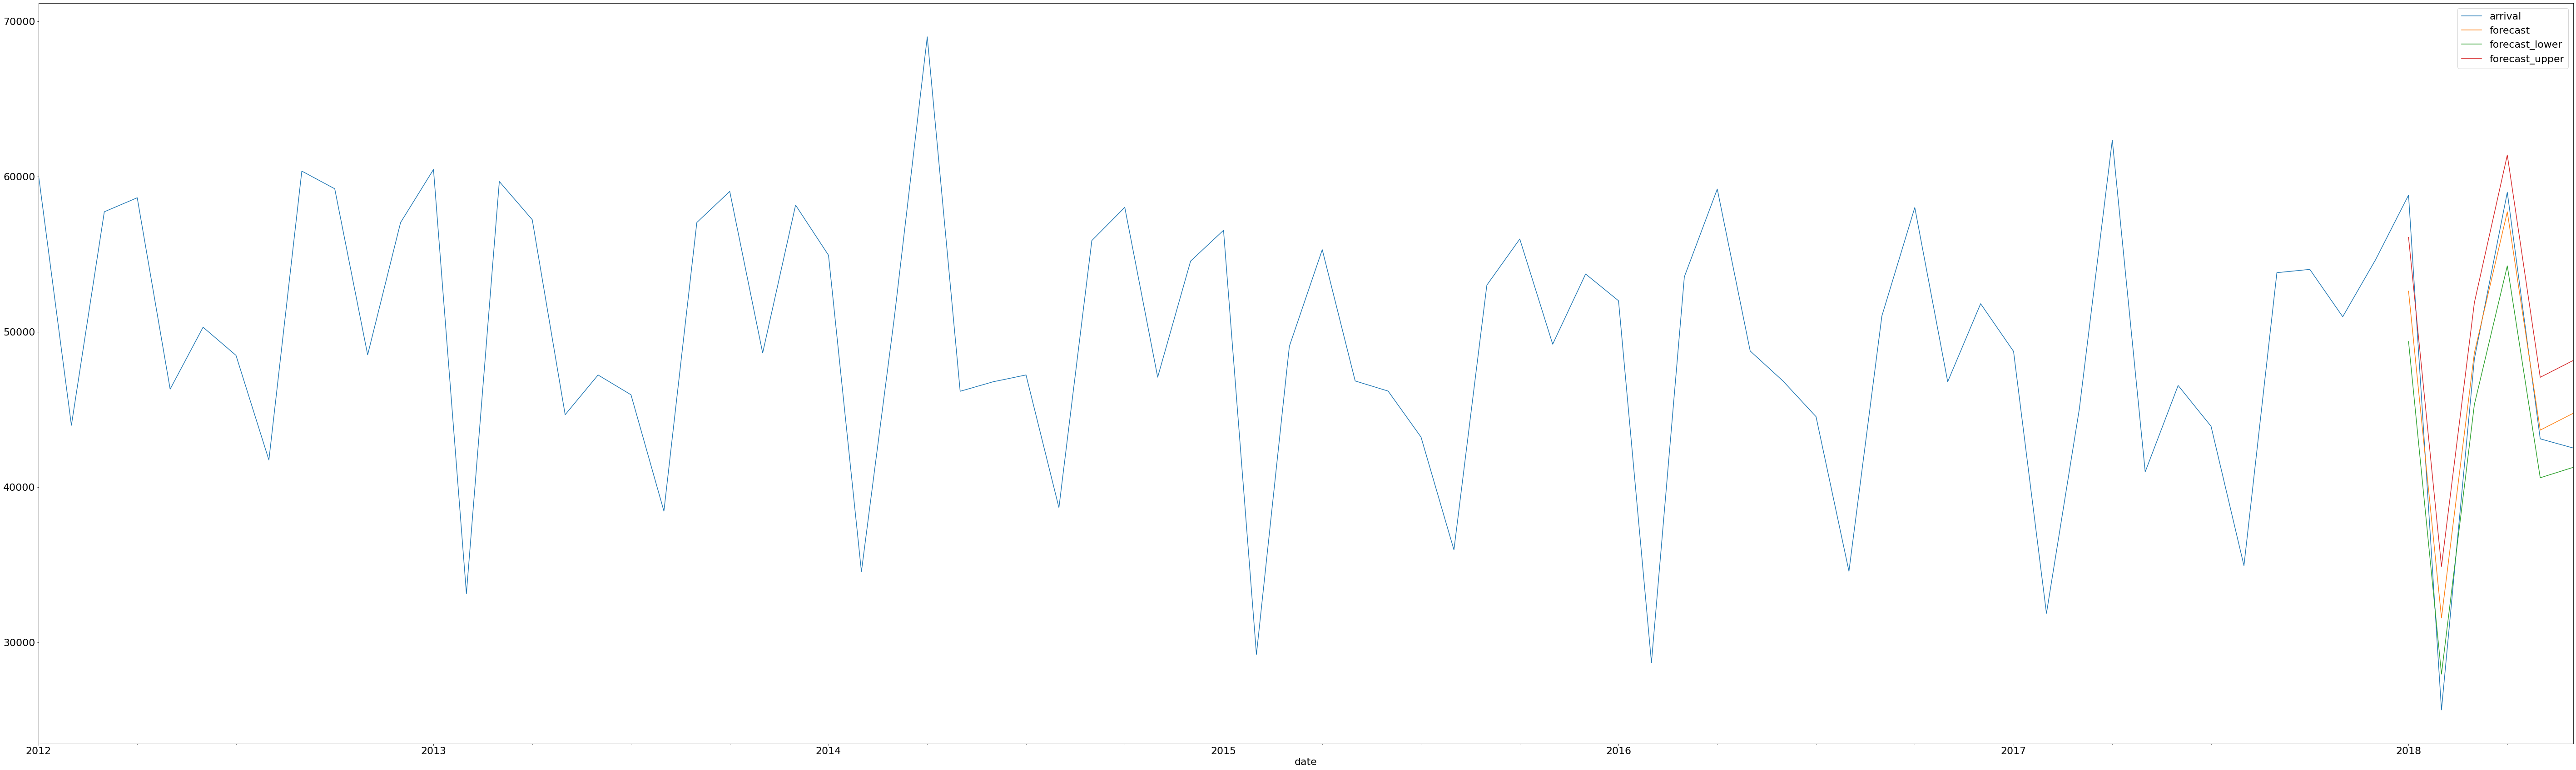

In [ ]:
error, forecasts = run_prophet(arrivals_df)
print(f"RMSE is {error}")

train_df = arrivals_df.loc['2012-01-01':'2017-12-01']
test_df = arrivals_df.loc['2018-01-01':'2018-06-01']
test_df[['forecast', 'forecast_lower', 'forecast_upper']] = forecasts[['fcst', 'fcst_lower', 'fcst_upper']].to_numpy()

plt.rcParams["figure.figsize"] = [100, 30]
plt.rcParams['font.size'] =  22

ax = pd.concat([train_df, test_df]).plot()